QUANTUM TELEPORTATION (SELF/REVISE)

In [24]:
from qiskit import QuantumRegister,ClassicalRegister,QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.circuit.library  import UGate 
from qiskit.visualization import plot_histogram,array_to_latex
from qiskit.result import marginal_distribution
from numpy import random,pi


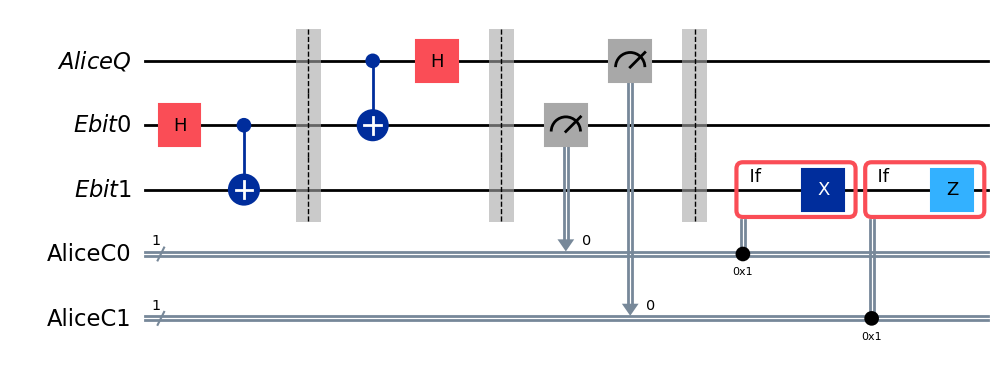

In [25]:
#Circuit Making
Q=QuantumRegister(1,"AliceQ")
ebit0=QuantumRegister(1,"Ebit0")
ebit1=QuantumRegister(1,"Ebit1")
Ac0=ClassicalRegister(1,"AliceC0")
Ac1=ClassicalRegister(1,"AliceC1")
crqt=QuantumCircuit(Q,ebit0,ebit1,Ac0,Ac1)
crqt.h(ebit0) #Intializing Entagled Bit
crqt.cx(ebit0,ebit1)
crqt.barrier()
crqt.cx(Q,ebit0)
crqt.h(Q)
crqt.barrier()
crqt.measure(ebit0,Ac0)
crqt.measure(Q,Ac1)
crqt.barrier()
with crqt.if_test((Ac0,1)):
    crqt.x(ebit1)
with crqt.if_test((Ac1,1)):
    crqt.z(ebit1)

display(crqt.draw("mpl"))

Testing Circuit


In [26]:
#Random Unitary gate
random_gate = UGate(
    theta=random.random() * 2 * pi,
    phi=random.random() * 2 * pi,
    lam=random.random() * 2 * pi
) 
display(array_to_latex(random_gate.to_matrix()))

<IPython.core.display.Latex object>

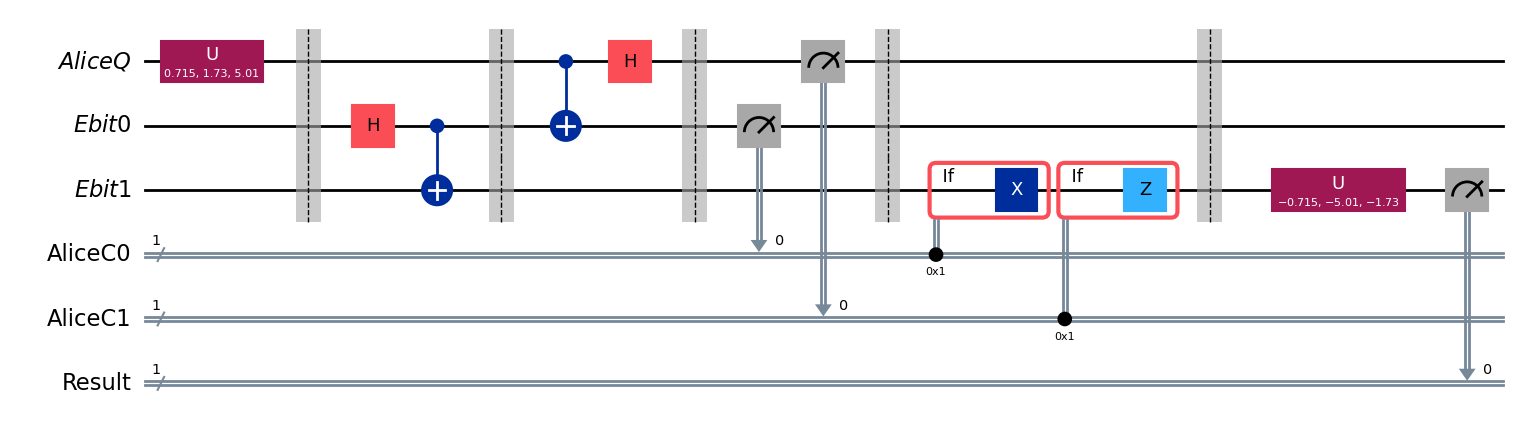

In [27]:
#Making of test circuit
test=QuantumCircuit(Q,ebit0,ebit1,Ac0,Ac1)

#Starting with random gate on q
test.append(random_gate, Q)
test.barrier()



#copying above circuit to test
test=test.compose(crqt)
test.barrier()

#append random gate to test
test.append(random_gate.inverse(),ebit1)
res=ClassicalRegister(1,"Result")
test.add_register(res)

#measuring Output
test.measure(ebit1,res)
display(test.draw("mpl"))

Running The Crqt

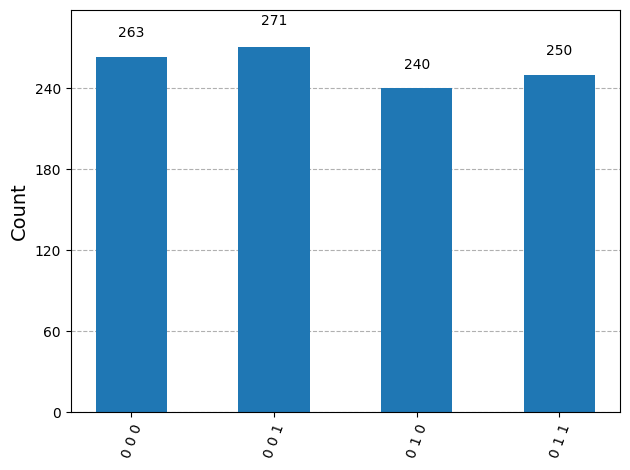

In [28]:
result=AerSimulator().run(test).result()
stats=result.get_counts()
plot_histogram(stats)

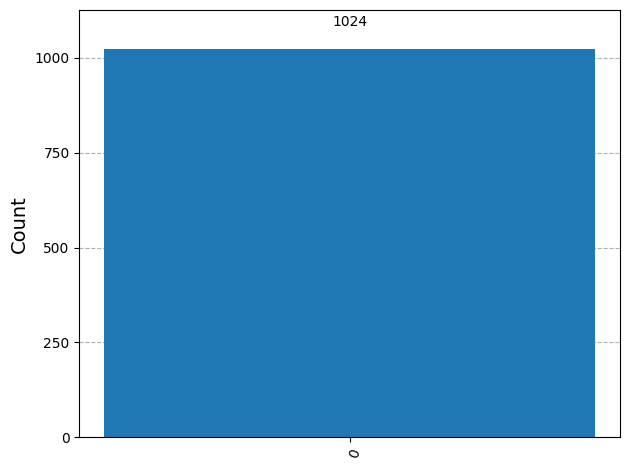

In [29]:
filtered_stats=marginal_distribution(stats,[2])
display(plot_histogram(filtered_stats))